In [88]:
# Задание 1
import numpy as np
from sklearn.metrics import pairwise_distances
import seaborn as sns

# матрица рейтингов фильмов
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

# матрица косинусного сходства
mas_cos_simil = pairwise_distances(raitings, metric='cosine')+np.eye(10)

# список с индексами наиболее похожих пользователей
matr_ = mas_cos_simil.argmin(axis =0)

# наиболее похожие пользователи 
for i in range(10):
    print("(x,y) = ",raitings[i],raitings[matr_[i]])

(x,y) =  [ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6] [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]
(x,y) =  [ 9  2  5 10  7  8 10  5  6  2  1  6  8  9  7] [ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6]
(x,y) =  [ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
(x,y) =  [6 1 9 7 7 9 2 3 5 1 6 6 3 2 7] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
(x,y) =  [ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6] [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]
(x,y) =  [ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
(x,y) =  [ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2] [6 1 9 7 7 9 2 3 5 1 6 6 3 2 7]
(x,y) =  [ 4  1  6  4  3 10  4  4  2  8  7  9  3  8  3] [ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1]
(x,y) =  [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4] [ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6]
(x,y) =  [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10] [ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6]


In [89]:
# Задание 2
from scipy.misc import derivative

# Посчитаем значение первой производной функции
def f(x):
    return np.tan(np.sin(x) + np.cos(2*x+3))**2

print("Первая производная функции в f(1)=", derivative(f,1.0,dx=1e-7, n=1))


Первая производная функции в f(1)= 55.385917665518036


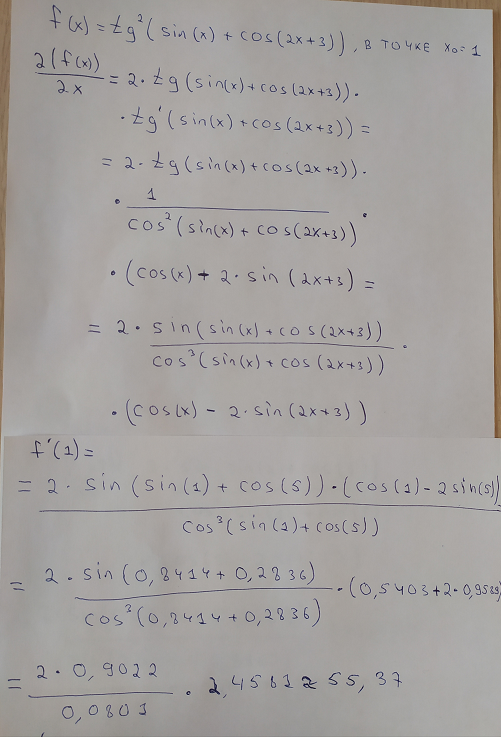

In [90]:
# Задание 2 (на бумаге)
from IPython.display import Image
Image(filename ="IMG_20210823_144224.png",width=600)

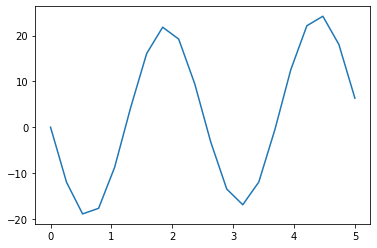

a = 3.000000000039421
b = -2.499999999978951
Значение абсолютной ошибки error = 1.5133360191654788e-06


In [91]:
# Задание 3
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution


def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

plt.plot(x, fx)
plt.show()

def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

# пределы изменения переменных
bounds = [(-5, 5), (-5, 5)]
# применим дифференциальную эволюцию
rezults = differential_evolution(error,bounds,seed=42)

print("a =",rezults.x[0])
print("b =",rezults.x[1])

# найдем ошибку
print("Значение абсолютной ошибки error =",error([rezults.x[0],rezults.x[1]]))



Text(0.5, 1.0, 'Гистограмма распределения средних')

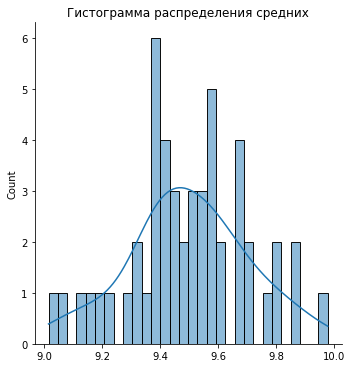

In [92]:
# Задание 4
# список для хранения средних значений
list_mean = []

for i in range(50):
    rand_list = np.random.randint(0,20,1000) # сгенериуруем 1000 случайных значений от 0 до 20
    list_mean.append(np.mean(rand_list))

    
ax = sns.displot(list_mean,
                 kde=True,
                 bins=30)

plt.title("Гистограмма распределения средних")


In [93]:
# Задание 5
# Найдите собственные значения и собственные вектора матриц:

m = np.array([[1, 4],
              [1, 1]])

l, v = np.linalg.eig(m)
print("собственные значения - ", l)
print("собственные вектора - ", v)

собственные значения -  [ 3. -1.]
собственные вектора -  [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


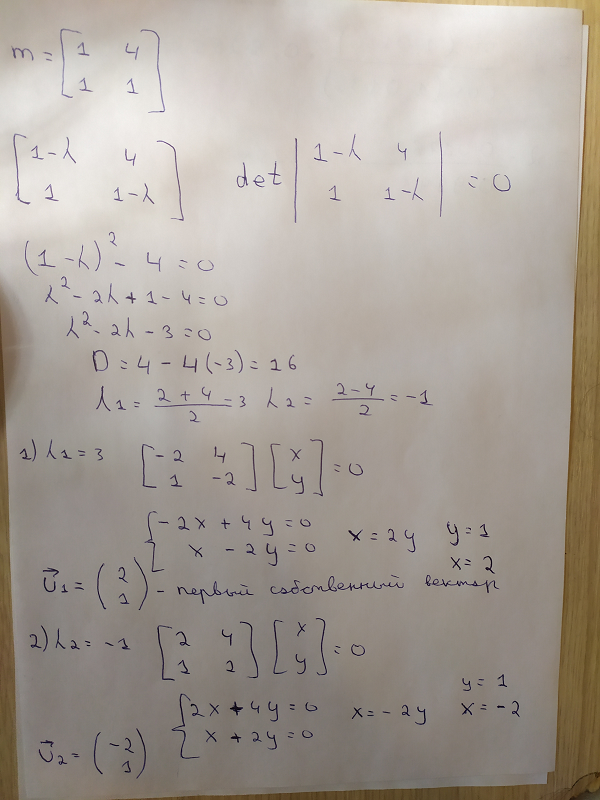

In [94]:
# Задание 5 (на бумаге)
from IPython.display import Image
Image(filename ="IMG_20210823_152627.png",width=600)